<a href="https://colab.research.google.com/github/marcostrivelato/Imers-o-de-Dados/blob/main/imersao_dados04_aula01_desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desafios:

1 - Realizar a média da metragem para cara um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [1]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [3]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Desafio 1,2 e 4 serão resolvidos juntos por praticidade

Primeiro usando .loc para selecionar o bairro ecolhido, no qual apos isso podemos aplicar vários metodos como média e mediana. 

In [156]:
metragem_mariana = dados.loc[dados['Bairro']=='Vila Mariana',['Metragem']]
media = metragem_mariana.mean()
mediana = metragem_mariana.median()
min = metragem_mariana.min()
max = metragem_mariana.max()
std = metragem_mariana.std()

print(f'media:{media}')
print(std)
print(mediana)
print(min)
print(max)

media:Metragem    233.619565
dtype: float64
Metragem    91.467315
dtype: float64
Metragem    235.5
dtype: float64
Metragem    60
dtype: int64
Metragem    650
dtype: int64


Para uma melhor vizualização e maior praticidade, uso o método agregate extrair os valores desejados.

Outro método interessante é o describe, que já indica alguns valores referentes a distribuição

In [38]:
metragem_mariana = dados.loc[dados['Bairro']=='Vila Mariana',['Metragem']]
metragem_mariana.agg(['mean','median','min','max'])

,Metragem
mean,233.619565
median,235.500000
min,60.000000
max,650.000000


In [56]:
metragem_mariana.describe()

,Metragem
count,184.000000
mean,233.619565
std,91.467315
min,60.000000
25%,166.000000
50%,235.500000
75%,285.000000
max,650.000000


Agora usamos o método .groupby, que aglutina todos as linhas com mesmo valor escolhido, para assim aplicar outros métodos como média ou mediana. Aqui quando aplicarmos métodos para calcular média (ou outros desejados) ele será executado para todas as colunas. Por fim os dados serão organizados pela área média dos imóveis.


In [46]:
dados.groupby('Bairro').mean().sort_values(by=['Metragem'])

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Vila Guaca,10.000000,3.000000,2.000000,2.000000
Vila Leonor,46.000000,2.000000,2.000000,1.000000
Jardim Benfica,48.000000,2.000000,1.000000,1.000000
Jardim Nova Germania,57.000000,3.000000,1.000000,5.000000
Cidade Antônio Estevão de Carvalho,57.500000,2.000000,1.000000,1.000000
...,...,...,...,...
Chácara Flora,1260.727273,4.818182,6.545455,7.272727
Jardim das Camélias,1700.000000,4.000000,7.000000,13.000000
Jardim Guedala,2486.640199,4.091811,5.732010,6.057072


In [47]:
dados.groupby('Bairro').median().sort_values(by=['Metragem'])

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Vila Guaca,10.0,3.0,2.0,2.0
Vila Leonor,46.0,2.0,2.0,1.0
Jardim Benfica,48.0,2.0,1.0,1.0
Jardim Nova Germania,57.0,3.0,1.0,5.0
Cidade Antônio Estevão de Carvalho,57.5,2.0,1.0,1.0
...,...,...,...,...
Chácara Flora,1300.0,5.0,6.0,9.0
Jardim Sílvia (Zona Oeste),1423.0,4.0,5.0,8.0
Jardim das Camélias,1700.0,4.0,7.0,13.0


In [54]:
dados.groupby('Bairro').min(['Metragem']).sort_values(by=['Metragem'])

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Vila Guaca,10,3,2,2
Jardim Ampliação,20,3,2,2
Parada Inglesa,29,1,1,1
Vila Madalena,35,1,1,1
Vila Bela,36,2,1,1
...,...,...,...,...
Vila Ivone,720,3,5,3
Vila Aurora (Zona Norte),1080,5,5,10
Jardim das Camélias,1700,4,7,13


In [55]:
dados.groupby('Bairro').max(['Metragem']).sort_values(by=['Metragem'])

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Vila Guaca,10,3,2,2
Vila Leonor,46,2,2,1
Jardim Benfica,48,2,1,1
Jardim Nova Germania,57,3,1,5
Cidade Antônio Estevão de Carvalho,60,2,1,1
...,...,...,...,...
Vila Castelo,2850,3,3,10
Santo Amaro,7126,7,12,50
Jardim da Glória,35677,6,9,13


Desafio 5, descobrindo bairros sem rua, e contando quantas entradas não contém a informação rua em cada bairro

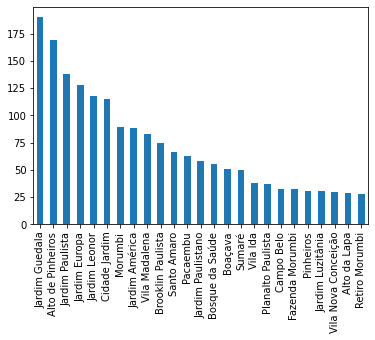

In [124]:
sem_rua = dados["Rua"].isna()
sem_rua_bairro = dados[sem_rua]
n_srua_bairro = sem_rua_bairro['Bairro'].value_counts()

n_srua_bairro.head(25).plot.bar()

In [130]:
n_srua_bairro

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

In [144]:
n_imoveis_bairro = dados["Bairro"].value_counts()
n_imoveis_bairro

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

In [183]:
nimoveis = pd.DataFrame(n_imoveis_bairro)
nsrua = pd.DataFrame(n_srua_bairro)

nimoveis.columns = nimoveis.columns.str.replace('Bairro', 'Total de Imoveis')
nsrua.columns = nsrua.columns.str.replace('Bairro', 'Imoveis sem endereco')

nimoveis

,Total de Imoveis
Alto de Pinheiros,409
Jardim Guedala,403
Jardim Paulista,309
Brooklin Paulista,247
Jardim Europa,240
...,...
Jardim das Imbuias,1
Vila Represa,1
Vila Nancy,1
Sítio Represa,1
